In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'D:\Users\Dell\OneDrive\Desktop\VIT_SmartInternz\archive\Garbage classification\Garbage classification',
                                          target_size=(64,64),
                                          class_mode='categorical',batch_size=100)

Found 2527 images belonging to 6 classes.


In [5]:
len(x_train)

26

In [6]:
x_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Importing Libraries:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Creating Model:

In [8]:
model=Sequential()

Adding Layers:

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
## Hidden Layer 1
model.add(Dense(300,activation='relu'))
## Hidden Layer 2
model.add(Dense(150,activation='relu'))

Output Layer:

In [13]:
model.add(Dense(6,activation='softmax'))

Compile the Model:

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the Model:

In [15]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)

C:\Users\Dell\AppData\Local\Temp/ipykernel_62336/3129788946.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)


Epoch 1/10
26/26 [==============================] - 8s 280ms/step - loss: 2.6053 - accuracy: 0.2188
Epoch 2/10
26/26 [==============================] - 6s 227ms/step - loss: 1.5655 - accuracy: 0.3474
Epoch 3/10
26/26 [==============================] - 8s 295ms/step - loss: 1.3836 - accuracy: 0.4571
Epoch 4/10
26/26 [==============================] - 7s 252ms/step - loss: 1.2893 - accuracy: 0.5038
Epoch 5/10
26/26 [==============================] - 6s 242ms/step - loss: 1.2193 - accuracy: 0.5433
Epoch 6/10
26/26 [==============================] - 6s 228ms/step - loss: 1.1365 - accuracy: 0.5825
Epoch 7/10
26/26 [==============================] - 6s 223ms/step - loss: 1.1080 - accuracy: 0.5928
Epoch 8/10
26/26 [==============================] - 6s 217ms/step - loss: 1.0508 - accuracy: 0.6126
Epoch 9/10
26/26 [==============================] - 6s 217ms/step - loss: 0.9981 - accuracy: 0.6343
Epoch 10/10
26/26 [==============================] - 6s 229ms/step - loss: 0.9684 - accuracy: 0.6510

In [16]:
model.save('garbage.h5')

Testing the Model:

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('garbage.h5')
img=image.load_img(r'D:\Users\Dell\OneDrive\Desktop\VIT_SmartInternz\archive\Garbage classification\Garbage classification\metal\metal18.jpg',
                   target_size=(64,64))

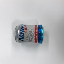

In [19]:
img

In [20]:
x=image.img_to_array(img)

In [21]:
x

array([[[230., 230., 230.],
        [226., 226., 226.],
        [224., 224., 224.],
        ...,
        [198., 197., 195.],
        [197., 195., 196.],
        [196., 194., 195.]],

       [[227., 227., 227.],
        [226., 226., 226.],
        [224., 224., 224.],
        ...,
        [198., 197., 195.],
        [196., 194., 195.],
        [196., 194., 195.]],

       [[225., 225., 225.],
        [224., 224., 224.],
        [224., 224., 224.],
        ...,
        [198., 197., 195.],
        [196., 194., 195.],
        [194., 192., 193.]],

       ...,

       [[226., 226., 228.],
        [226., 226., 228.],
        [226., 226., 228.],
        ...,
        [182., 182., 182.],
        [179., 179., 179.],
        [178., 178., 178.]],

       [[228., 228., 230.],
        [226., 226., 228.],
        [226., 226., 228.],
        ...,
        [184., 184., 184.],
        [183., 183., 183.],
        [182., 182., 182.]],

       [[230., 230., 232.],
        [226., 226., 228.],
        [225., 2

In [22]:
x.ndim

3

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[230., 230., 230.],
         [226., 226., 226.],
         [224., 224., 224.],
         ...,
         [198., 197., 195.],
         [197., 195., 196.],
         [196., 194., 195.]],

        [[227., 227., 227.],
         [226., 226., 226.],
         [224., 224., 224.],
         ...,
         [198., 197., 195.],
         [196., 194., 195.],
         [196., 194., 195.]],

        [[225., 225., 225.],
         [224., 224., 224.],
         [224., 224., 224.],
         ...,
         [198., 197., 195.],
         [196., 194., 195.],
         [194., 192., 193.]],

        ...,

        [[226., 226., 228.],
         [226., 226., 228.],
         [226., 226., 228.],
         ...,
         [182., 182., 182.],
         [179., 179., 179.],
         [178., 178., 178.]],

        [[228., 228., 230.],
         [226., 226., 228.],
         [226., 226., 228.],
         ...,
         [184., 184., 184.],
         [183., 183., 183.],
         [182., 182., 182.]],

        [[230., 230., 232.],
       

In [25]:
x.ndim

4

In [26]:
pred=np.argmax(model.predict(x),axis=1)

In [27]:
pred

array([4], dtype=int64)

In [28]:
index=['cardboard','glass','metal','paper','plastic','trash']
print(index[pred[0]])

plastic


Open CV:

In [29]:
import cv2

In [30]:
img=cv2.imread(r'D:\Users\Dell\OneDrive\Desktop\VIT_SmartInternz\archive\Garbage classification\Garbage classification\paper\paper42.jpg',1)

In [31]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [157, 175, 186],
        [157, 175, 186],
        [157, 175, 186]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [158, 176, 187],
        [157, 175, 186],
        [157, 175, 186]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [158, 176, 187],
        [158, 176, 187],
        [157, 175, 186]],

       ...,

       [[114,  79,  53],
        [121,  91,  64],
        [104,  80,  58],
        ...,
        [158, 175, 184],
        [158, 175, 184],
        [157, 174, 183]],

       [[121,  87,  63],
        [114,  84,  59],
        [120,  99,  78],
        ...,
        [158, 175, 184],
        [157, 174, 183],
        [157, 174, 183]],

       [[132, 101,  76],
        [108,  80,  56],
        [138, 119,  98],
        ...,
        [157, 174, 183],
        [157, 174, 183],
        [157, 174, 183]]

In [34]:
img1=cv2.imread(r'D:\Users\Dell\OneDrive\Desktop\VIT_SmartInternz\archive\Garbage classification\Garbage classification\paper\paper42.jpg',0)

In [35]:
img1

array([[255, 255, 255, ..., 176, 176, 176],
       [255, 255, 255, ..., 177, 176, 176],
       [255, 255, 255, ..., 177, 177, 176],
       ...,
       [ 75,  86,  76, ..., 176, 176, 175],
       [ 84,  80,  95, ..., 176, 175, 175],
       [ 97,  76, 115, ..., 175, 175, 175]], dtype=uint8)

In [36]:
print(img)

[[255 255 255 ... 176 176 176]
 [255 255 255 ... 177 176 176]
 [255 255 255 ... 177 177 176]
 ...
 [ 75  86  76 ... 176 176 175]
 [ 84  80  95 ... 176 175 175]
 [ 97  76 115 ... 175 175 175]]


In [37]:
print(img.shape)

(384, 512)


In [38]:
img=cv2.imread(r'D:\Users\Dell\OneDrive\Desktop\VIT_SmartInternz\archive\Garbage classification\Garbage classification\paper\paper42.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

CNN Video Analysis:

In [42]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('garbage.h5')
video=cv2.VideoCapture(0)
index=['cardboard','glass','metal','paper','plastic','trash']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'Output : '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()